In [2]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

#Upload from csv
data_set_path = "Healthcare-Diabetes.csv"

#Read data and results
data_set_df = pd.read_csv(data_set_path)

data_set_df.head()



,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


# Clean the Data

In [7]:
#Identify how many unique ids there are
id_unique = data_set_df["Id"].value_counts()
id_unique

#Count total number of participants
id_count = len(id_unique)
id_count

2768

In [14]:
#List of all columns
data_set_df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
#Reorganize Data Frame to move age next to ID number
data_set_2_df = data_set_df[["Id", "Age", 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']]
data_set_2_df.head()

,Id,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,1,50,6,148,72,35,0,33.6,0.627,1
1,2,31,1,85,66,29,0,26.6,0.351,0
2,3,32,8,183,64,0,0,23.3,0.672,1
3,4,21,1,89,66,23,94,28.1,0.167,0
4,5,33,0,137,40,35,168,43.1,2.288,1


In [20]:
#Check for incomplete rows
data_set_2_df.count()

Id                          2768
Age                         2768
Pregnancies                 2768
Glucose                     2768
BloodPressure               2768
SkinThickness               2768
Insulin                     2768
BMI                         2768
DiabetesPedigreeFunction    2768
Outcome                     2768
dtype: int64

In [21]:
#Check Data Types
data_set_2_df.dtypes

Id                            int64
Age                           int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Outcome                       int64
dtype: object

In [22]:
#Display statistical data
data_set_2_df.describe()

,Id,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,33.132225,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,0.343931
std,799.197097,11.777230,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,0.475104
min,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,692.750000,24.000000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,0.000000
50%,1384.500000,29.000000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,0.000000
75%,2076.250000,40.000000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,1.000000
max,2768.000000,81.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,1.000000


In [25]:
#Reindex with ID number
data_set_final_df = data_set_2_df.set_index("Id")
data_set_final_df


,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Id,,,,,,,,,
1,50,6,148,72,35,0,33.6,0.627,1
2,31,1,85,66,29,0,26.6,0.351,0
3,32,8,183,64,0,0,23.3,0.672,1
4,21,1,89,66,23,94,28.1,0.167,0
5,33,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...,...
2764,33,2,75,64,24,55,29.7,0.370,0
2765,36,8,179,72,42,130,32.7,0.719,1
2766,42,6,85,78,0,0,31.2,0.382,0


# Age and Outcome Analysis

In [29]:
#Find the max and min age
max_age = data_set_final_df["Age"].max()
min_age = data_set_final_df["Age"].min()

print(f"The minimum age is {min_age} and the maximum age is {max_age}")

The minimum age is 21 and the maximum age is 81


In [27]:
#Find the age distribution of the women in the survey
data_set_final_df["Age"].value_counts()

Age
22    264
21    229
25    182
24    168
23    141
28    133
26    117
27    113
29     99
31     82
30     77
41     73
37     67
42     66
36     62
38     61
33     60
45     57
46     48
34     48
39     48
40     48
43     47
32     47
35     37
50     29
44     28
58     28
52     27
47     23
51     21
49     19
48     19
54     18
55     18
63     17
66     16
53     15
62     14
67     13
57     12
60     12
65     11
56     10
59      9
69      8
61      7
72      4
81      4
64      4
70      4
68      4
Name: count, dtype: int64

In [37]:
#Create Bins for the distribution
bins = [21, 30, 40, 50, 60, 70, 80, 90]

#Names for bins
bin_names = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90"]


In [38]:
#Place the data into bins
data_set_final_df["Age Groups"] = pd.cut(data_set_final_df["Age"],bins,
                                        labels = bin_names,
                                        include_lowest = True)
data_set_final_df

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age Groups
Id,,,,,,,,,,
1,50,6,148,72,35,0,33.6,0.627,1,41-50
2,31,1,85,66,29,0,26.6,0.351,0,31-40
3,32,8,183,64,0,0,23.3,0.672,1,31-40
4,21,1,89,66,23,94,28.1,0.167,0,21-30
5,33,0,137,40,35,168,43.1,2.288,1,31-40
...,...,...,...,...,...,...,...,...,...,...
2764,33,2,75,64,24,55,29.7,0.370,0,31-40
2765,36,8,179,72,42,130,32.7,0.719,1,31-40
2766,42,6,85,78,0,0,31.2,0.382,0,41-50


In [39]:
#Split data into bins to find age group distribution
data_set_bins_reordered_df = data_set_final_df[["Age", "Age Groups",'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Outcome']]

data_set_bins_reordered_df.head()

,Age,Age Groups,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Id,,,,,,,,,,
1,50,41-50,6,148,72,35,0,33.6,0.627,1
2,31,31-40,1,85,66,29,0,26.6,0.351,0
3,32,31-40,8,183,64,0,0,23.3,0.672,1
4,21,21-30,1,89,66,23,94,28.1,0.167,0
5,33,31-40,0,137,40,35,168,43.1,2.288,1


In [45]:
#Count Data in bins
age_group_counts = data_set_bins_reordered_df["Age Groups"].value_counts()
age_group_counts

Age Groups
21-30    1523
31-40     560
41-50     409
51-60     170
61-70      98
71-80       4
81-90       4
Name: count, dtype: int64

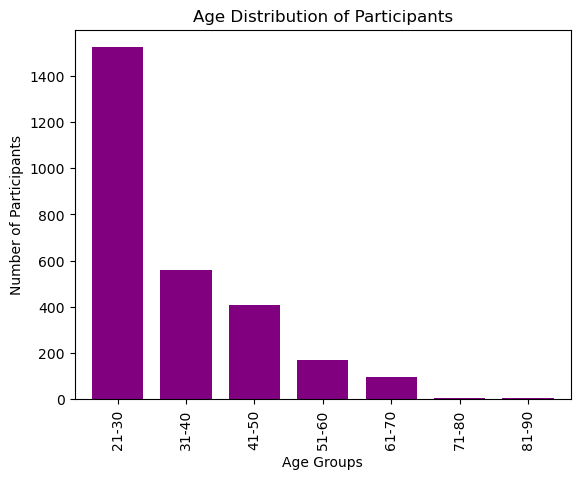

In [49]:
#Bar Graph
age_group_counts.plot(kind="bar", width=0.75, color = "purple")

#Labels
plt.title("Age Distribution of Participants")
plt.xlabel("Age Groups")
plt.ylabel("Number of Participants")
plt.show()

In [50]:
#Find average age
data_set_final_df["Age"].mean()

33.13222543352601

# Reset Null Values

In [51]:
relevant_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data_set_final_df[relevant_columns] = data_set_final_df[relevant_columns].replace(0, np.nan)

data_set_final_df.head()

,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Age Groups
Id,,,,,,,,,,
1,50,6,148.0,72.0,35.0,NaN,33.6,0.627,1,41-50
2,31,1,85.0,66.0,29.0,NaN,26.6,0.351,0,31-40
3,32,8,183.0,64.0,NaN,NaN,23.3,0.672,1,31-40
4,21,1,89.0,66.0,23.0,94.0,28.1,0.167,0,21-30
5,33,0,137.0,40.0,35.0,168.0,43.1,2.288,1,31-40


# Correlation of Glucose and Insulin

In [54]:
#Make new data fram with only necessary information

glu_ins_df = data_set_final_df[["Age", "Glucose", "Insulin"]]
glu_ins_df.head()

,Age,Glucose,Insulin
Id,,,
1,50,148.0,NaN
2,31,85.0,NaN
3,32,183.0,NaN
4,21,89.0,94.0
5,33,137.0,168.0


In [58]:
#Find null values of columns
glu_ins_df.count()

Age        2768
Glucose    2750
Insulin    1438
dtype: int64

In [61]:
#Drop Rows
glu_ins_new_df = glu_ins_df.dropna(how="any")

In [62]:
#Verify dropped rows
glu_ins_new_df.count()


Age        1435
Glucose    1435
Insulin    1435
dtype: int64

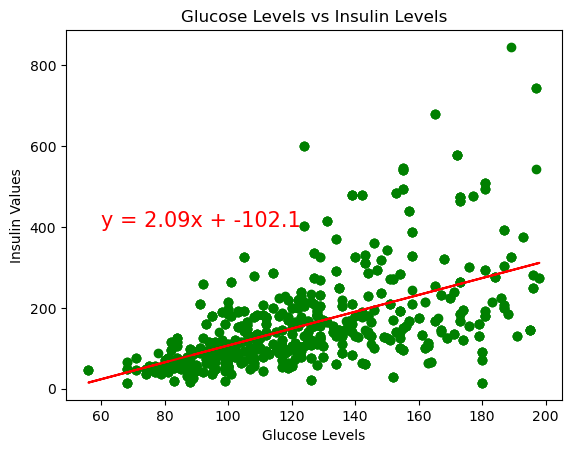

In [77]:
#Create scatter plot comparing Glucose levels and Insulin levels
x_values = glu_ins_new_df["Glucose"]
y_values = glu_ins_new_df["Insulin"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, c = "g")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,400),fontsize=15, color = "red")
plt.xlabel("Glucose Levels")
plt.ylabel("Insulin Values")
plt.title("Glucose Levels vs Insulin Levels")
plt.show()

# Box and Whisker of Glucose Levels

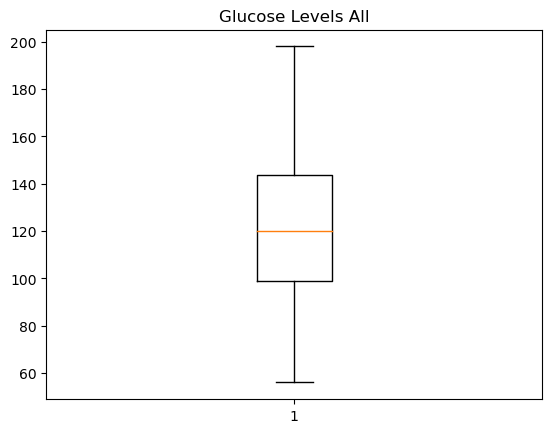

In [90]:
#Assign variable for glucose
glucose = glu_ins_new_df["Glucose"]

plt.boxplot(glucose)
plt.title("Glucose Levels All")
plt.show()



In [89]:
#Statistical Analysis for all
quartiles = glucose.quantile([.25, .5, .75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr=upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is {upperq}")
print(f"The median is: {quartiles[0.5]}")
print(f"The IQR is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

print(f"The max value is: {glucose.max()}")
print(f"The min value is: {glucose.min()}")
print("There are no outliers")

The lower quartile is: 99.0
The upper quartile is 143.5
The median is: 120.0
The IQR is: 44.5
Lower Bound: 32.25
Upper Bound: 210.25
The max value is: 198.0
The min value is: 56.0
There are no outliers


# Box and Whisker of Glucose with Diabetes

In [113]:
#Filter to only those with diabetes

glucose_yes_df = data_set_final_df.loc[data_set_final_df["Outcome"]==1]
glucose_yes_df.count()

Age                         952
Pregnancies                 952
Glucose                     944
BloodPressure               897
SkinThickness               647
Insulin                     467
BMI                         947
DiabetesPedigreeFunction    952
Outcome                     952
Age Groups                  952
dtype: int64

In [114]:
#Make new data frame with only necessary columns
glucose_yes_df = glucose_yes_df[["Glucose", "Outcome"]]
glucose_yes_df.count()

Glucose    944
Outcome    952
dtype: int64

In [115]:
#Drop Null Values
glucose_yes_new_df = glucose_yes_df.dropna(how="any")
glucose_yes_new_df.count()

Glucose    944
Outcome    944
dtype: int64

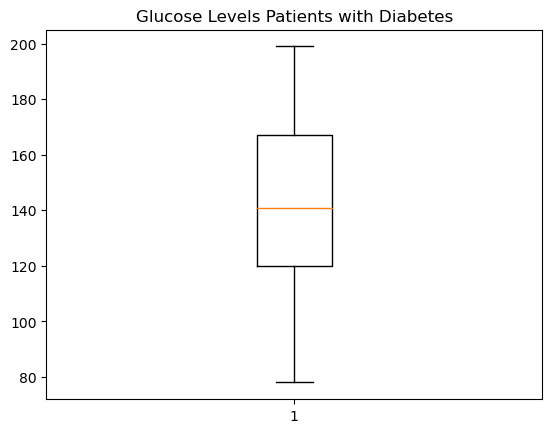

In [116]:
#Assign variable for Glucose
glucose_yes = glucose_yes_new_df["Glucose"]
plt.boxplot(glucose_yes)
plt.title("Glucose Levels Patients with Diabetes")
plt.show()

# Box and Whisker for Glucose Not with Diabetes

In [117]:
#Filter to only those with diabetes

glucose_no_df = data_set_final_df.loc[data_set_final_df["Outcome"]==0]
glucose_no_df.count()

Age                         1816
Pregnancies                 1816
Glucose                     1806
BloodPressure               1746
SkinThickness               1321
Insulin                      971
BMI                         1782
DiabetesPedigreeFunction    1816
Outcome                     1816
Age Groups                  1816
dtype: int64

In [118]:
#Make new data frame with only necessary columns
glucose_no_df = glucose_no_df[["Glucose", "Outcome"]]
glucose_no_df.count()

Glucose    1806
Outcome    1816
dtype: int64

In [119]:
#Drop Null Values
glucose_no_new_df = glucose_no_df.dropna(how="any")
glucose_no_new_df.count()

Glucose    1806
Outcome    1806
dtype: int64

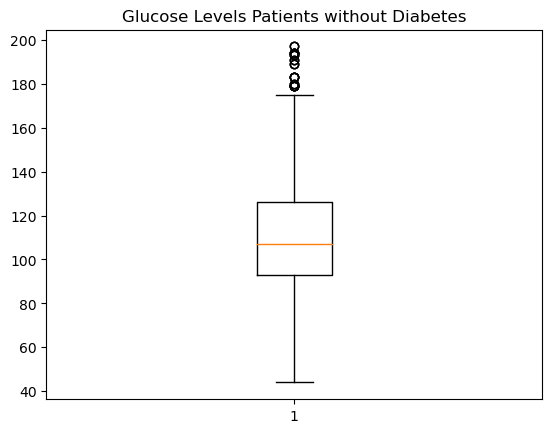

In [120]:
#Assign variable for Glucose
glucose_no = glucose_no_new_df["Glucose"]
plt.boxplot(glucose_no)
plt.title("Glucose Levels Patients without Diabetes")
plt.show()

# Multiple Box Plots - Glucose Levels

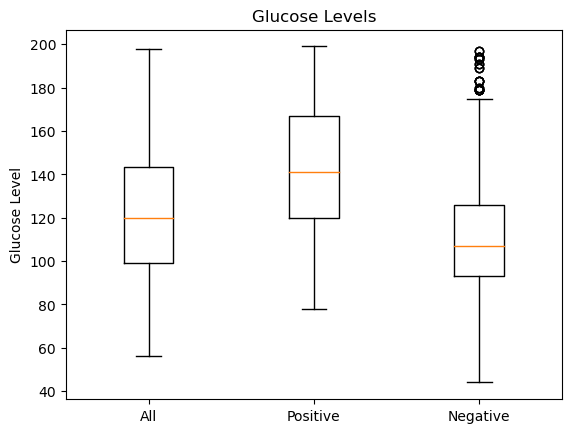

In [126]:
x_axis = [glucose, glucose_yes, glucose_no]
fig, ax1 = plt.subplots()
ax1.set_ylabel("Glucose Level")
ax1.boxplot(x_axis)
ax1.set_title("Glucose Levels")

tick_locations = [1, 2, 3]
plt.xticks(tick_locations,["All", "Positive", "Negative"])

plt.show()